- Create function to apply 

In [26]:
import os
import re
import shutil
import string

import demoji
import numpy as np
import pandas as pd
import spacy
import en_core_web_sm
from matplotlib import pyplot as plt
from spacy.language import Language
from spacy_langdetect import LanguageDetector

In [2]:
# Listing all file paths in the Tweet Data folder 
data_path = os.listdir('Datasets/Tweet Data')
data_path.sort()
data_path = ['Datasets/Tweet Data/{}'.format(file) for file in data_path]
data_path = pd.DataFrame(data_path,columns=['File Path'])

# Getting the counter from the file name in to the dataframe
try:
    data_path = pd.concat([data_path,pd.DataFrame(data_path['File Path'].str.split(r'_',expand=True)[2])],axis=1)
    data_path = pd.concat([data_path,data_path[2].str.split(r'\.',expand=True)],axis=1,)
    data_path = data_path[['File Path',0]]
    data_path.columns = ['File Path', 'Counter']
    data_path['Counter'] = data_path['Counter'].apply(lambda x: int(x))
    
except:
    print('error')

In [10]:
# Reading the shape of the relevant excel sheet

from distutils.log import error
day = 0

for i,file in enumerate(data_path.values):
    if np.mod(file[1],1440)==0:
        try:
            day +=1
            print(day,i,file[1],pd.read_csv(file[0],engine='python',index_col=0).shape)
            shutil.copy(file[0],'Datasets/Daily Tweet Data/{}.csv'.format(day))
        except error as e:
            print(e)

1 22 1440 (19357, 11)
2 47 2880 (20904, 11)
3 71 4320 (20553, 11)
4 96 5760 (20568, 11)
5 121 7200 (20319, 11)
6 145 8640 (20308, 11)
7 169 10080 (20598, 11)
8 193 11520 (20454, 11)
9 217 12960 (20477, 11)
10 240 14400 (20265, 11)
11 264 15840 (20371, 11)
12 289 17280 (20204, 11)
13 313 18720 (20368, 11)
14 337 20160 (20563, 11)
15 361 21600 (20744, 11)
16 384 23040 (20156, 11)
17 408 24480 (20535, 11)
18 432 25920 (20602, 11)
19 456 27360 (20306, 11)
20 481 28800 (20125, 11)
21 505 30240 (20490, 11)
22 529 31680 (20497, 11)
23 552 33120 (20452, 11)
24 577 34560 (20588, 11)
25 601 36000 (20356, 11)
26 625 37440 (20595, 11)
27 649 38880 (20556, 11)
28 673 40320 (20648, 11)
29 697 41760 (20663, 11)
30 721 43200 (20452, 11)
31 743 44640 (20173, 11)
32 744 44640 (20187, 11)
33 766 46080 (20411, 11)
34 790 47520 (20572, 11)
35 813 48960 (20270, 11)
36 837 50400 (20156, 11)
37 861 51840 (20398, 11)
38 885 53280 (20335, 11)
39 908 54720 (19922, 11)
40 931 56160 (19966, 11)
41 956 57600 (20128

In [37]:
pritspacy.util.get_data_path()

In [29]:
def get_lang_detector(nlp, name):
   return LanguageDetector()

spacy.util.set_data_path = r'/Users/varunparbhu/python_virtual_env/mur_crypto/lib/python3.9/en_core_web_sm'
nlp = spacy.load("en_core_web_sm")
Language.factory("language_detector", func = get_lang_detector)
nlp.add_pipe('language_detector', last = True)

OSError: [E049] Can't find spaCy data directory: 'None'. Check your installation and permissions, or use spacy.util.set_data_path to customise the location if necessary.

In [12]:
def tweet_language(tweet):
    document = nlp(tweet)
    return document._.language['language']

In [13]:
data = pd.read_csv(data_path['File Path'][22],engine='python',index_col=0)

In [14]:
data['lang'] = data['clean_tweet'].apply(tweet_language)

KeyError: 'clean_tweet'

<BarContainer object of 10 artists>

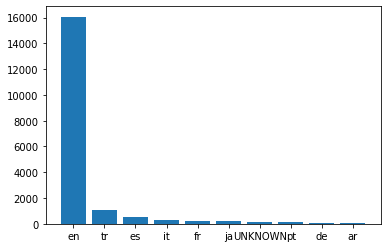

In [249]:
plt.bar(height = data['lang'].value_counts().values[:10],x=data['lang'].value_counts().index[:10])

In [15]:
data['lang'].value_counts().index

KeyError: 'lang'

- Remove @[someone] - Done
- Remove string 'RT'- Done
- Remove new line - Done
- Remove punctuation (Remove # only; keep the string) - Done
- Remove links to http - Done
- Replace emojis by description - Done

In [242]:
def pre_process_tweet (text):
    #Remove all links starting with http...
    text = re.sub('https?:\/\/.*[\r\n]*','',text)
    #Remove RT
    text = re.sub('^RT[\s]+','',text)
    #Remove @[User]
    text = re.sub('@[^ ]+', '', text)
    #Remove Punctuation first
    text = text.translate(str.maketrans('','', string.punctuation))
    #Convert text to lower case
    text = text.lower()
    #Removing any number
    #text = re.sub('[0-9]+ ','',text)
    #Removing any number with text
    #text = re.sub('[0-9]+.+\s*','',text)
    text = re.sub(r'\w*\d\w*', '', text).strip()
    #Remove new line
    text = re.sub('\n',' ',text)
    #Replace emojis with description
    text = demoji.replace_with_desc(text,sep=' ')
    #Reducing whitespaces to one everywhere
    text = re.sub('\s+',' ',text)
    
    return text

In [246]:
data['clean_tweet'] = data['tweed_id'].apply(pre_process_tweet)

In [247]:
for i in range(10):
    print("ORIGINAL: {} \n PROCESSED: {} \n \n".format(data['tweed_id'][i], data['clean_tweet'][i]))

ORIGINAL: RT @saylor: With USD prices increasing at the most rapid rate in 40 years, the @POTUS and @FederalReserve have both declared a "laser focus… 
 PROCESSED: with usd prices increasing at the most rapid rate in years the and have both declared a laser focus… 
 

ORIGINAL: RT @KayonTai: 六一兒童節快樂🥳！！今天抽出三位大朋友送出各50USDT兒童節禮物💝，明日12點左右公佈。

抽獎方式
1⃣關注@KayonTai
2⃣點讚轉發
3⃣留下TRC20地址並@一位小朋友
#BTC #Bitcoin #ETH #Ethereum http… 
 PROCESSED: 六一兒童節快樂 partying face ！！ heart with ribbon ，。 抽獎方式 ⃣關注 bitcoin eth ethereum http… 
 

ORIGINAL: RT @AirdropStario: 💧 Binance Classic Airdrop 💧

🏆 Task:          ➕  Up to 50 Million BNBC (~$100)

👨‍👩‍👧 Referral:   ➕  15 Million BNBC(~$3… 
 PROCESSED:  droplet binance classic airdrop droplet trophy task plus up to million bnbc family: man, woman, girl referral plus million … 
 

ORIGINAL: RT @Crypto12bill: Very high yield in a stable dollar, low risk. Legitimizing crypto spaces.#EverEarn is all Professionalism and integrity.… 
 PROCESSED: very high yield in a sta